In [3]:
import h5py 
"""
H5py:
The h5py package is a Pythonic interface to the HDF5 binary data format.

It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. 
For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. 
Thousands of datasets can be stored in a single file, categorized and tagged however you want.
"""
import numpy as np
import os

In [4]:
# This is the command to open the file. 
# Very important is to ALWAYS add the 'r' condition to avoid overriding the data!
h5 = h5py.File('/mnt/nas4/datasets/ToReadme/PROCESS/denseSampling/uc1-results/l5_c0_p004_n4/patches.h5', 'r')

In [5]:
# The first file in the data folder is now loaded in the RAM, and we can start inspecting the way it is structured
# We create a list that will contain all the entries in the file. 
# We make this global so that it is accessible from any fuction, anywhere in the code
global dblist
dblist=[]
def list_entries(name, obj):
        if 'patches' in name:
            dblist.append(name)
# visititems is the function to visit all the file entries, the function list_entries will creat the lisdt            
h5.visititems(list_entries) 

In [12]:
# The visititems operation can take a while if the h5 file is large. 
# We now inspect the list of files
print "There are {} entries in the h5py file".format(len(dblist))
print "The patches for the first entry in the file are at this link within the h5py: {}".format(dblist[0])

There are 1464 entries in the h5py file
The patches for the first entry in the file are at this link within the h5py: normal/l5/c0/p004/n4/0/patches


In [18]:
# The h5py allows to access data as if they were intexed by links. 
# To access some patches, we always have to specify a link within the file
print h5[dblist[0]]
# At the link of dblist[0], there are stored 500 patches of dimension 224x224x3. 

<HDF5 dataset "patches": shape (500, 224, 224, 3), type "|u1">


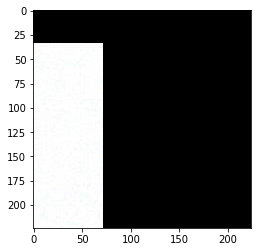

In [19]:
# We now visualize the first patch 
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(h5[dblist[0]][0])

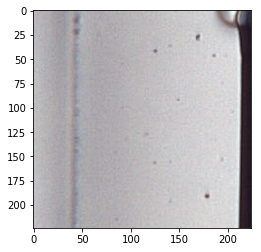

In [31]:
# To access the i-th patch, we just have to do h5[dblist[0]][i]
%matplotlib inline
import matplotlib.pyplot as plt
i=50
plt.imshow(h5[dblist[0]][i])

In [34]:
# Another way to inspect the data structure is to ask for the keys with the .keys() function: 
print h5.keys()

[u'normal', u'tumor']

In [35]:
print h5['normal'].keys()

[u'l5']


In [37]:
print h5['normal']['l5'].keys()

[u'c0']


In [41]:
# As you see, here there are quite some keys
# 'normal' and 'tumor' define the tissue type
# 'l5' is fixed for the magnification level
# 'c0' stays for center0, and there could be also 'c1', 'c2', 'c3' and 'c4'
# 'p004' is the patinet number. There are many patients.
# 'n4' is the node number, there are also 'n0', 'n1', 'n2' and 'n3'
print h5['normal']['l5']['c0']['p004']['n4'].keys()

[u'0', u'1', u'10', u'100', u'1000', u'1001', u'1002', u'1003', u'1004', u'1005', u'1006', u'1007', u'1008', u'1009', u'101', u'1010', u'1011', u'1012', u'1013', u'1014', u'1015', u'1016', u'1017', u'1018', u'1019', u'102', u'1020', u'1021', u'1022', u'1023', u'1024', u'1025', u'1026', u'1027', u'1028', u'1029', u'103', u'1030', u'1031', u'1032', u'1033', u'1034', u'1035', u'1036', u'1037', u'1038', u'1039', u'104', u'1040', u'1041', u'1042', u'1043', u'1044', u'1045', u'1046', u'1047', u'1048', u'1049', u'105', u'1050', u'1051', u'1052', u'1053', u'1054', u'1055', u'1056', u'1057', u'1058', u'1059', u'106', u'1060', u'1061', u'1062', u'1063', u'1064', u'1065', u'1066', u'1067', u'1068', u'1069', u'107', u'1070', u'1071', u'1072', u'1073', u'1074', u'1075', u'1076', u'1077', u'1078', u'1079', u'108', u'1080', u'1081', u'1082', u'1083', u'1084', u'1085', u'1086', u'1087', u'1088', u'1089', u'109', u'1090', u'1091', u'1092', u'1093', u'1094', u'1095', u'1096', u'1097', u'1098', u'1099', 

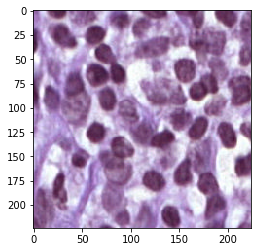

In [44]:
# The keys at h5['normal']['l5']['c0']['p004']['n4'].keys() are all the batches that contain the data for p004. 
# We should access each of them, for example
plt.imshow(h5['normal']['l5']['c0']['p004']['n4']['1310']['patches'][0])

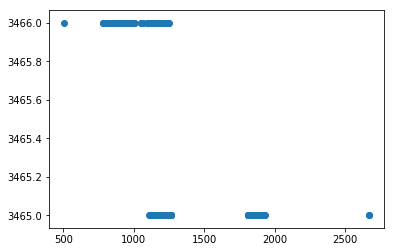

In [56]:
# To have an (intuitive) idea about the patch locations in a batch, you can run
plt.scatter(h5['normal']['l5']['c0']['p004']['n4']['1310']['locations'][:].T[1],h5['normal']['l5']['c0']['p004']['n4']['1310']['locations'][:].T[0])